In [13]:
from mylib.calculator import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

df = load_dataset()

df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [14]:
# Print Schema of the tables
print(df.shape)
print(df.info())
df.head()
# Checking distinc values in each columns
df.nunique()
# Show summary of the table
df.describe()
# Show correlation
df.corr()
# Not showing outputs to save space

(37137, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB
None


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,1.000000,0.000312,-0.001248,-0.000506,-0.004370,0.002427,-0.000980,-0.000911,0.001887,-0.001358
MedInc,0.000312,1.000000,-0.080542,0.699994,-0.127169,-0.008552,-0.000885,-0.060463,-0.043742,0.701925
HouseAge,-0.001248,-0.080542,1.000000,-0.156625,-0.056960,-0.235459,-0.002792,0.021071,-0.090394,0.103210
AveRooms,-0.000506,0.699994,-0.156625,1.000000,0.174753,-0.038099,0.023858,0.095169,-0.088184,0.366727
AveBedrms,-0.004370,-0.127169,-0.056960,0.174753,1.000000,-0.007120,-0.009257,0.026142,0.015218,-0.067487
Population,0.002427,-0.008552,-0.235459,-0.038099,-0.007120,1.000000,0.022825,-0.069944,0.071085,-0.038479
AveOccup,-0.000980,-0.000885,-0.002792,0.023858,-0.009257,0.022825,1.000000,-0.032199,0.037118,-0.048475
Latitude,-0.000911,-0.060463,0.021071,0.095169,0.026142,-0.069944,-0.032199,1.000000,-0.937370,-0.116499
Longitude,0.001887,-0.043742,-0.090394,-0.088184,0.015218,0.071085,0.037118,-0.937370,1.000000,-0.056742
MedHouseVal,-0.001358,0.701925,0.103210,0.366727,-0.067487,-0.038479,-0.048475,-0.116499,-0.056742,1.000000


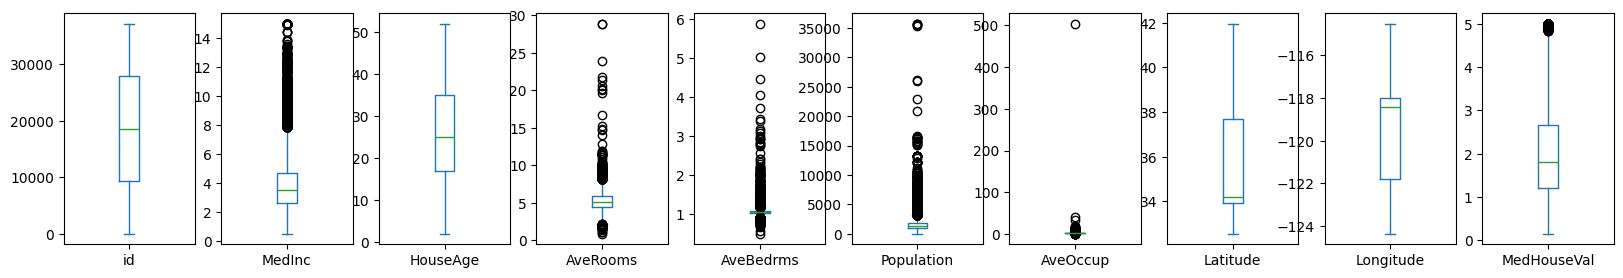

In [15]:

# Check distrubution of the columns by using bar graphs
df.plot(kind='box', subplots=True, figsize=(20, 3))
plt.show()

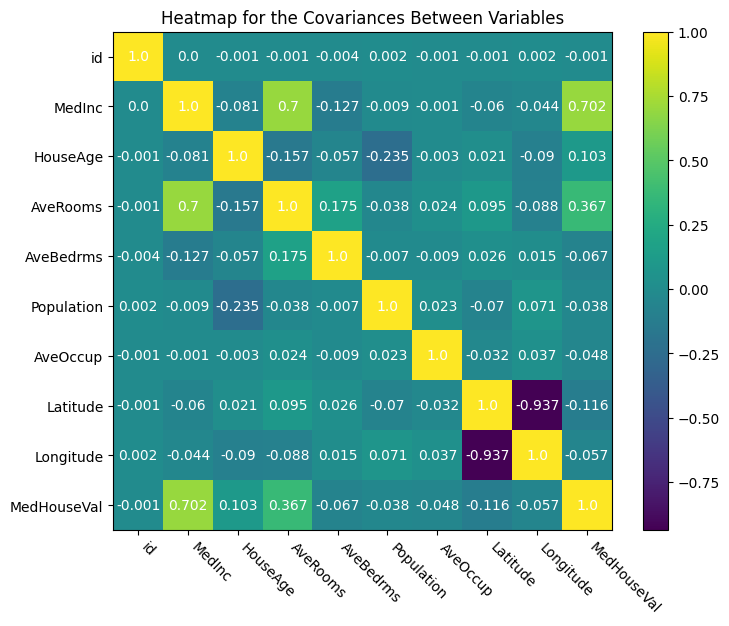

In [16]:
# Defining function
def make_covar_heatmap(df: pd.DataFrame, title: str, size: (int,int)):
    
    fig, ax = plt.subplots()
    im = ax.imshow(df, cmap="viridis")

    # Adding the values for each "pixel"
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            value = round(df[df.columns[i]][df.columns[j]], 3)
            ax.text(j, i, value, ha="center", va="center", color="w")

    # Adding Lables       
    ax.set_xticks(range(df.shape[1]), labels=df.columns, rotation=-45, ha="left")
    ax.set_yticks(range(df.shape[1]), labels=df.columns)
    ax.set_title(title)
    fig.tight_layout()
    fig.set_size_inches(size)
    fig.colorbar(im)
    
    plt.show()

make_covar_heatmap(df.corr(), "Heatmap for the Covariances Between Variables", (7,7))

In [21]:
# Some tests
assert max(df.id) == 37136
assert min(df.id) == 0
assert df.MedInc	 is not None
assert df.HouseAge	 is not None
assert df.AveRooms	 is not None
assert df.AveBedrms	 is not None
assert df.Population	 is not None
assert df.AveOccup	 is not None
assert df.Latitude	 is not None
assert df.Longitude	 is not None
assert df.MedHouseVal is not None
